In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(array,bin_num,default=True):
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    return bins, n

def colour_plot_hist(array,label,colour,default=False):
    array = [row[5]-row[1] for row in array if row[0]>0 and row[1] > 0]
    bin_num = int((np.max(array)-np.min(array))/0.01)
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label,drawstyle='steps-mid',color=colour)
    return 

def petro_plot_hist(array,label,default=False):
    array = [row[1] for row in array]
    bin_num = int((np.max(array)-np.min(array))/0.01)
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label,drawstyle='steps-mid')
    return n,bins

def surface_brightness_plot_hist(array,label,bin_num=800,default=False):
    array = [row[1]+2.5*np.log10(2*np.pi*row[4]*row[4]) for row in array]
    bin_num = int((np.max(array)-np.min(array))/0.005)
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label,drawstyle='steps-mid')
    return 

def redshifts_plot_hist(array,label,bin_num=800,default=False):
    array = [row[3] for row in array if 0.3 > row[3] > 0.01 ]
    bin_num = int((np.max(array)-np.min(array))/0.001)
    print(bin_num)
    n, bins = np.histogram(array,bins=int(bin_num),normed=default)
    plt.plot(bins[1:],n,label=label,drawstyle='steps-mid')
    return n, bins


# this notebook is looking at how the final selection compares to the MGS in each band pass
# 0 sdss.modelMag_u, 
# 1 sdss.modelMag_r, 
# 2 sdss.petroMag_r, 
# 3 spec.z, 
# 4 sdss.petroR50_r, 
# 5 galex.fuv_mag, 
# 6 galex.nuv_mag, 
# 7 sdss.modelMag_u, 
# 8 sdss.modelMag_g,
# 9 sdss.modelMag_r,
# 10 sdss.modelMag_i,
# 11 sdss.modelMag_z
# 12 ukidss.yPetroMag, 
# 13 ukidss.j_1PetroMag,
# 14 ukidss.hPetroMag,
# 15 ukidss.kPetroMag,
# 16 wise.w1mpro ,  
# 17 wise.w2mpro , 
# 18 wise.w3mpro , 
# 19 wise.w4mpro , 
# 20 galex.fuv_magerr,
# 21 galex.nuv_magerr,
# 22 sdss.modelMagErr_u ,
# 23 sdss.modelMagErr_g , 
# 24 sdss.modelMagErr_r,
# 25 sdss.modelMagErr_i, 
# 26 sdss.modelMagErr_z,
# 27 ukidss.yPetroMagErr, 
# 28 ukidss.j_1PetroMagErr, 
# 29 ukidss.hPetroMagErr, 
# 30 ukidss.kPetroMagErr, 
# 31 wise.w1sigmpro, 
# 32 wise.w2sigmpro, 
# 33 wise.w3sigmpro, 
# 34 wise.w4sigmpro

In [99]:
galaxies = np.load('/home/calum/Documents/Mphys_data/cat_check/cat_check_properties.npy')
mgs = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mgs_colours.npy')

galaxies.shape

(61198, 35)

In [86]:
rlimgalaxies = [row for row in galaxies if 0.1>row[3]>0.001]

In [87]:
len(rlimgalaxies)

32148

In [88]:
for i in range(5,20):
    print(len([row for row in rlimgalaxies if row[i]>-100]))

22449
31252
32146
32146
32148
32148
32146
31520
30791
31601
31752
32148
32148
32148
32148


In [89]:
mw_sample = [row for row in rlimgalaxies if row[5]>-100 and row[6]>-100 and row[7]>-100 and row[8]>-100 and
                                    row[9]>-100 and row[10]>-100 and row[11]>-100 and row[12]>-100 and
                                    row[13]>-100 and row[14]>-100 and row[15]>-100 and row[16]>-100 and
                                    row[17]>-100 and row[18]>-100 and row[19]>-100]

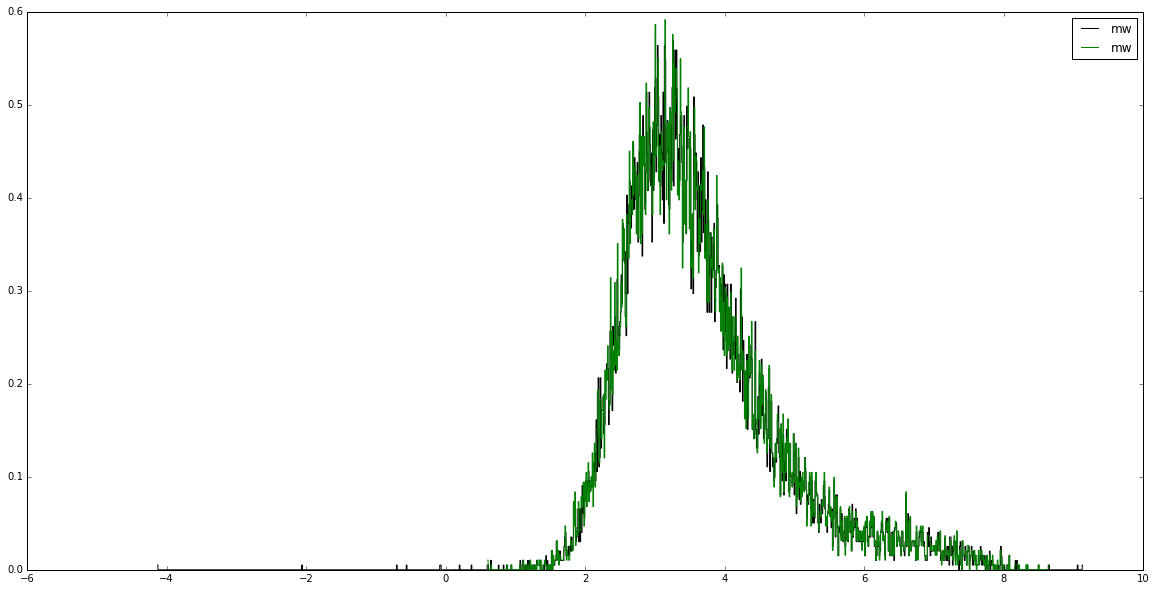

In [102]:
plt.figure(figsize=(20,10))
colour_plot_hist([row for row in mw_sample],'mw','k',default=True)
colour_plot_hist([row for row in mw_sample if 17.8 > row[2] > 14.5],'mw','g',default=True)
#colour_plot_hist(mgs,'mgs','g',default=True)
#plt.xlim(0,5)
plt.legend()

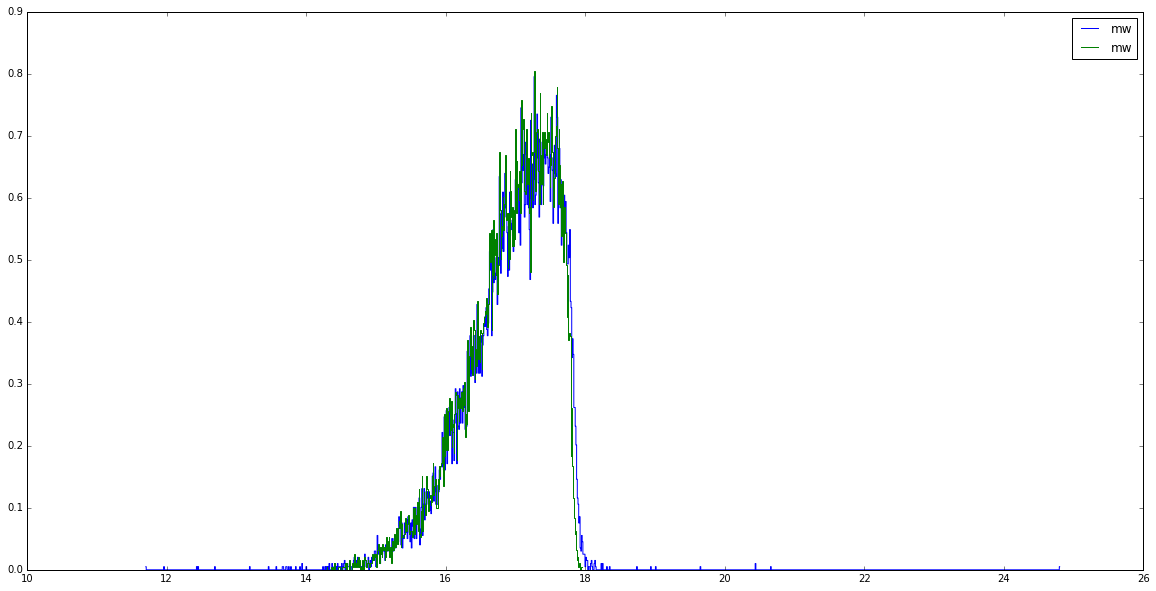

In [91]:
plt.figure(figsize=(20,10))
petro_plot_hist([row for row in mw_sample],'mw','k')
petro_plot_hist([row for row in mw_sample if 17.8 > row[2] > 14.5],'mw','k')
plt.legend()

In [92]:
len([row for row in mw_sample if 17.8 > row[2] > 14.5])

19082

In [104]:
len(mw_sample)

19862

In [103]:
np.save('/home/calum/Documents/Mphys_data/mgs_multiwavelength/mw_sample.npy',mw_sample)